# Clase 1 - Redes Neuronales : Una introducción

## Configuación

### Instrucciones de instalación

1. Crear un nuevo ambiente llamado deep_learning
conda create -n deep_learning python=3.10 -y

2. Activar el ambiente
conda activate deep_learning

3. Instalar TensorFlow y Keras (Keras viene incluido con TensorFlow)
pip install tensorflow

4. Instalar bibliotecas adicionales para visualización y manejo de datos
pip install matplotlib seaborn pandas numpy

5. Instalar Jupyter Lab y configurarlo para VS Code
pip install jupyterlab ipykernel
python -m ipykernel install --user --name=deep_learning --display-name "Python (deep_learning)"

6. Verificar las versiones instaladas (opcional)
python -c "import tensorflow as tf; print('TensorFlow:', tf.__version__)"
python -c "import matplotlib; print('Matplotlib:', matplotlib.__version__)"
python -c "import seaborn; print('Seaborn:', seaborn.__version__)"
python -c "import pandas as pd; print('Pandas:', pd.__version__)"
python -c "import numpy as np; print('NumPy:', np.__version__)"

7. Configurar VS Code
 - Instalar el plugin "Jupyter" en VS Code.
 - Abrir un archivo `.ipynb` en VS Code.
 - Seleccionar el kernel "Python (deep_learning)" desde la parte superior derecha.

 8. (Opcional) Iniciar Jupyter Lab para comprobar el entorno

### Librerias

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step
Epoch 1/5


/opt/miniconda3/envs/deep_learning/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8959 - loss: 0.3373 - val_accuracy: 0.9822 - val_loss: 0.0590
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9847 - loss: 0.0491 - val_accuracy: 0.9872 - val_loss: 0.0432
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9906 - loss: 0.0308 - val_accuracy: 0.9875 - val_loss: 0.0429
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9933 - loss: 0.0216 - val_accuracy: 0.9899 - val_loss: 0.0361
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9945 - loss: 0.0168 - val_accuracy: 0.9887 - val_loss: 0.0396
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9865 - loss: 0.0378
Accuracy en el conjunto de prueba: 0.99
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


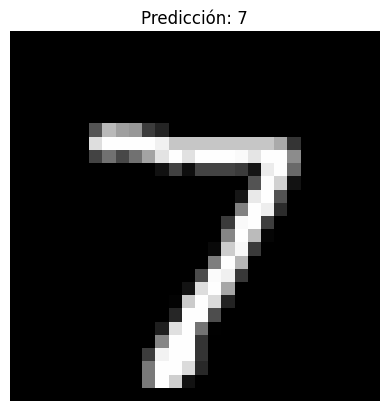

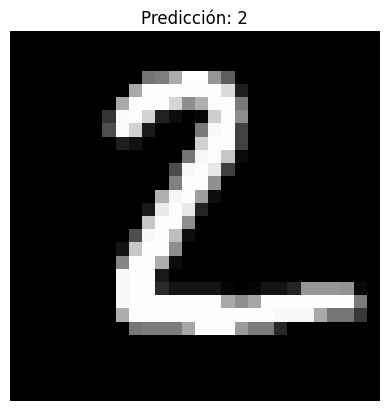

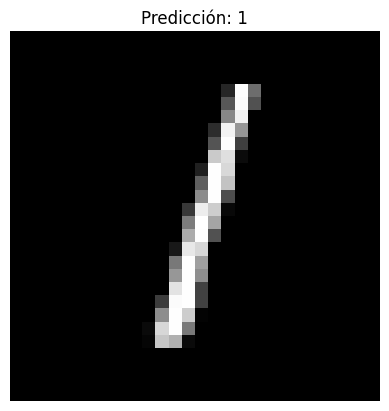

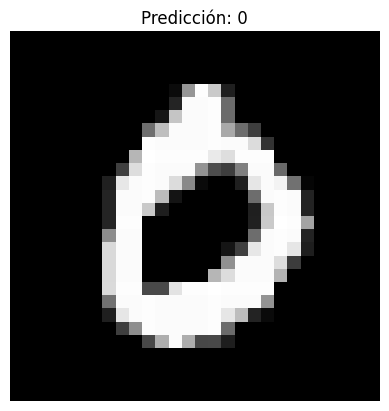

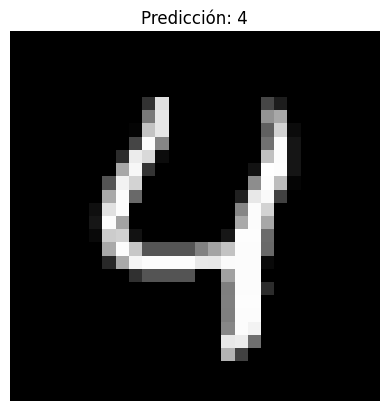

In [ ]:
# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los datos
x_train = x_train / 255.0
x_test = x_test / 255.0

# Redimensionar las imágenes para añadir el canal de color (1 para escala de grises)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convertir las etiquetas en formato one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Crear el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 clases (0-9)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy en el conjunto de prueba: {test_accuracy:.2f}")

# Visualizar algunas predicciones
predictions = model.predict(x_test)

# Mostrar las primeras 5 imágenes junto con sus predicciones
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicción: {predictions[i].argmax()}")
    plt.axis('off')
    plt.show()
